In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [49]:

def cross_entropy_error(y,t,eps=1e-8):
    """ common/functions.py  """
    
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    # one-hot-vectorから正解ラベルのインデックスに
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    # print y
    # print y[np.arange(batch_size),t]
    return -np.sum(np.log(y[np.arange(batch_size),t]+eps))/batch_size

def softmax(x):
    """ common/functions.py  """
    
    
    # mnistとかやる場合は2次元配列(データ数x入力次元)
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x,axis=0)
        exp_x = np.exp(x)
        y = exp_x / np.sum(exp_x,axis=0)
        return y.T
    
    x = x - np.max(x)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def sigmoid(x):
    """ シグモイド関数 """
    return 1/(1+np.exp(-x))



In [50]:
#coding:utf-8
import numpy as np

def numerical_gradient(f,x,eps=1e-8):
    """ common/gradient.py """
    f0 = f(x)
    grad = np.zeros_like(x)

    # http://www.aipacommander.com/entry/2017/05/14/172220    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        i = it.multi_index
        #print i
        
        x[i]+=eps
        f1 = f(x)
        x[i]-=eps
        grad[i] = (f1-f0)/eps
        
        it.iternext()
    
    return grad



In [51]:
from functions import *
from gradient import *
import numpy as np

class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params={}
        self.params["W1"] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["b2"] = np.zeros(output_size)
    
    def predict(self,x):
        W1,W2 = self.params["W1"],self.params["W2"]
        b1,b2 = self.params["b1"],self.params["b2"]
        
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)
        
        return y
    
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)
        
        grads = {}
        for key in ["W1","b1","W2","b2"]:
            grads[key] = numerical_gradient(loss_W,self.params[key])
        return grads



In [42]:
dataset = pd.read_csv("./train.csv")

In [43]:
# datasetを読み込む
t_temp = dataset[[0]].values.ravel().astype(np.uint8)
x_dataset = np.array(dataset.iloc[:,1:].values.astype(np.uint8))
n_dataset = len(t_temp)
t_dataset = np.zeros((n_dataset,10),np.uint8)
t_dataset[np.arange(n_dataset),t_temp]=1 # 1-hot 表現にする

# ランダムシャッフルする
index = np.arange(n_dataset)
np.random.shuffle(index)

x_dataset = x_dataset[index]
t_dataset = t_dataset[index]

# 教師データとテストデータに分割
n_test = n_dataset / 4
n_train = n_dataset - n_test 
x_train , t_train, x_test, t_test = \
    x_dataset[:n_train],t_dataset[:n_train],x_dataset[n_train:],t_dataset[n_train:]

itr 0


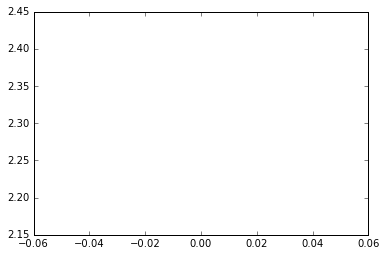

In [53]:
iter_num = 1#00
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []

network = TwoLayerNet(input_size = 784,hidden_size = 10,output_size=10)

for i in range(iter_num):
    print("itr %d" % i)
    
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch,t_batch)
    for key in ["W1","b1","W2","b2"]:
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

plt.plot(train_loss_list)

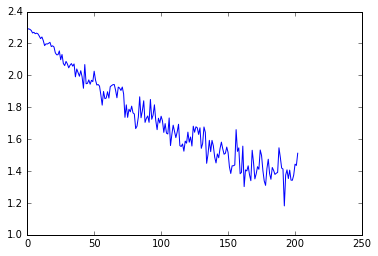

In [29]:
plt.plot(train_loss_list)

In [34]:
y = network.predict(x_train)
y = np.argmax(y,axis=1)
t = np.argmax(t_train,axis=1)

accuracy = np.sum(y==t) / float(x_train.shape[0])
print(accuracy)

0.546380952381


In [ ]:
y.shape